In [ ]:
# 4.1. Import library:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Understanding the data:

In [ ]:
# 4.2. Import the data:
df=pd.read_csv('/content/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
 df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,20800.0,10399.500000,6004.587135,0.0,5199.75,10399.5,15599.25,20799.0
label,20800.0,0.500625,0.500012,0.0,0.00,1.0,1.00,1.0


In [ ]:
print(df['label'].unique())


[1 0]


In [ ]:
df['label'] = df['label'].astype(int)


In [ ]:
print(df[df['label'] == 0]['title'].head())
print(df[df['label'] == 1]['title'].head())


1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
5    Jackie Mason: Hollywood Would Love Trump if He...
7    Benoît Hamon Wins French Socialist Party’s Pre...
8    Excerpts From a Draft Script for Donald Trump’...
9    A Back-Channel Plan for Ukraine and Russia, Co...
Name: title, dtype: object
0    House Dem Aide: We Didn’t Even See Comey’s Let...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
6    Life: Life Of Luxury: Elton John’s 6 Favorite ...
Name: title, dtype: object


In [ ]:
#sentiment count:
df['label'].value_counts()

,count
label,
1,10413
0,10387


<Axes: >

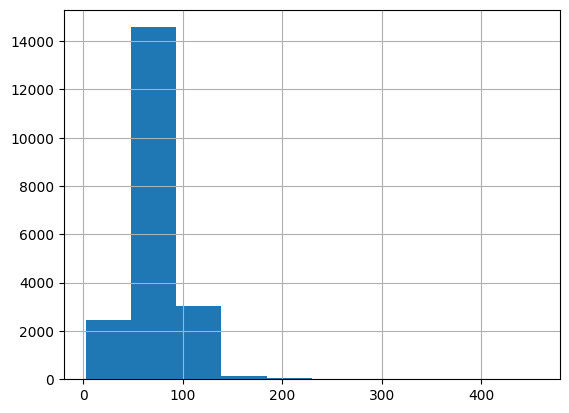

In [ ]:
df['title'].str.len().hist()

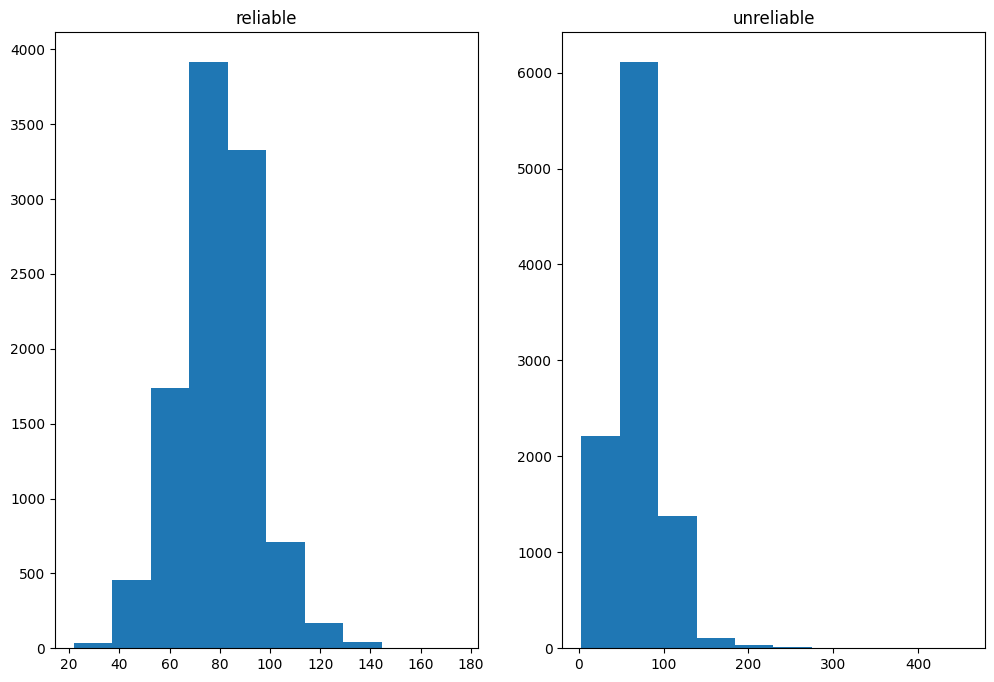

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.hist(df[df['label'] == 0]['title'].str.len())
ax1.set_title('reliable')
ax2.hist(df[df['label'] == 1]['title'].str.len())
ax2.set_title('unreliable')
plt.show()


1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
5    Jackie Mason: Hollywood Would Love Trump if He...
7    Benoît Hamon Wins French Socialist Party’s Pre...
8    Excerpts From a Draft Script for Donald Trump’...
9    A Back-Channel Plan for Ukraine and Russia, Co...
Name: title, dtype: object


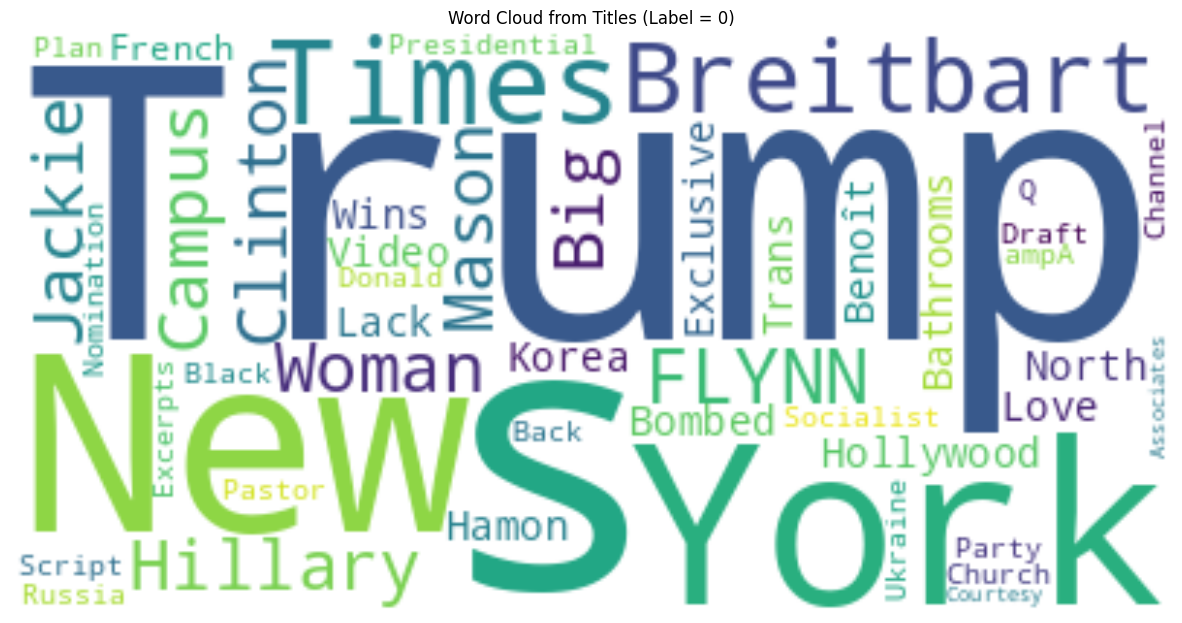

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# افترض أن df هو DataFrame الخاص بك

# طباعة الخمس عناوين الأولى ذات التصنيف '0'
print(df[df['label'] == 0]['title'].head())

# تجميع النصوص من العناوين ذات التصنيف '0' (الخمس الأولى فقط)
text = " ".join(df[df['label'] == 0]['title'].head().dropna().tolist())

# تحقق من أن النص ليس فارغًا
if text:
    # إنشاء سحابة الكلمات
    wordcloud = WordCloud(background_color="white").generate(text)

    # عرض سحابة الكلمات
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud from Titles (Label = 0)')
    plt.show()
else:
    print("No titles to generate a word cloud.")



0    House Dem Aide: We Didn’t Even See Comey’s Let...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
6    Life: Life Of Luxury: Elton John’s 6 Favorite ...
Name: title, dtype: object


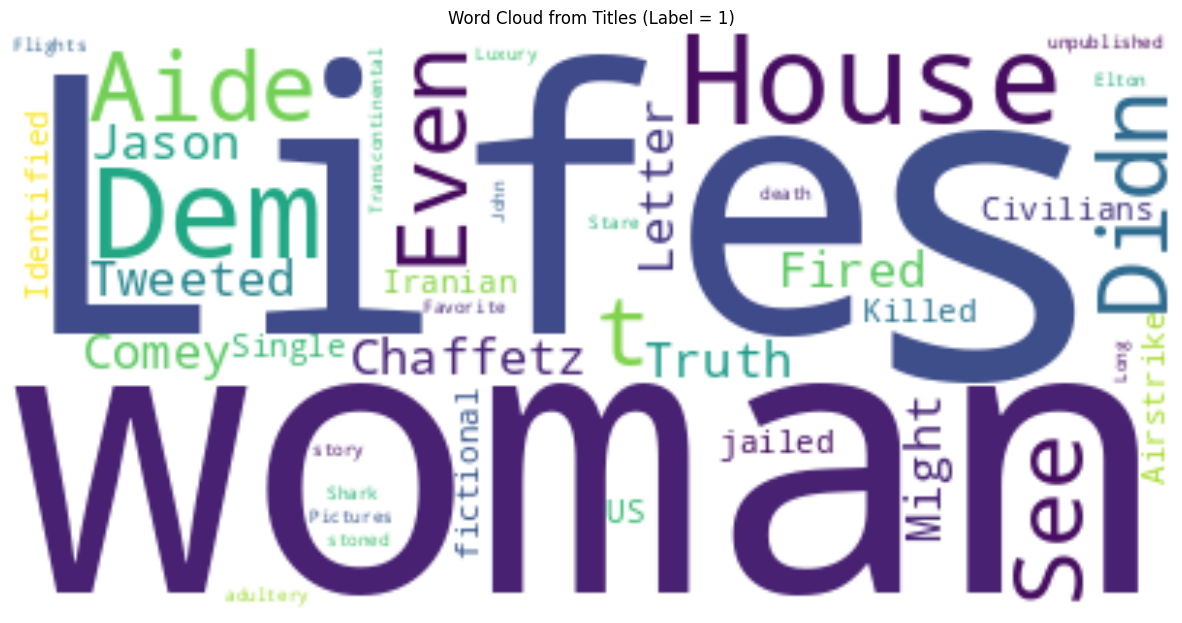

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# افترض أن df هو DataFrame الخاص بك

# طباعة الخمس عناوين الأولى ذات التصنيف '0'
print(df[df['label'] == 1]['title'].head())

# تجميع النصوص من العناوين ذات التصنيف '0' (الخمس الأولى فقط)
text = " ".join(df[df['label'] == 1]['title'].head().dropna().tolist())

# تحقق من أن النص ليس فارغًا
if text:
    # إنشاء سحابة الكلمات
    wordcloud = WordCloud(background_color="white").generate(text)

    # عرض سحابة الكلمات
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud from Titles (Label = 1)')
    plt.show()
else:
    print("No titles to generate a word cloud.")


# DATA PREPROCESSING:

In [ ]:
print(df['title'].isnull().sum())


558


In [ ]:
df.dropna(subset=['title'])


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
#save datat set after dropping missing vlue
df.to_csv('train_clean.csv', index=False)

In [ ]:
df=pd.read_csv('/content/train_clean.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
import re
import string

def cleaning(title):
    # Check if the title is a string before applying string operations
    if isinstance(title, str):
        # converting to lowercase, removing URL links, special characters, punctuations...
        title = title.lower() # converting to lowercase
        title = re.sub('https?://\S+|www\.\S+', '', title) # removing URL links
        title = re.sub(r"\b\d+\b", "", title) # removing number
        title = re.sub('<.*?>+', '', title) # removing special characters,
        title = re.sub('[%s]' % re.escape(string.punctuation), '', title) # punctuations
        title = re.sub('\n', '', title)
        title = re.sub('[’“”…]', '', title)

        #removing emoji:
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        title = emoji_pattern.sub(r'', title)

        # removing short form:

        title=re.sub("isn't",'is not',title)
        title=re.sub("he's",'he is',title)
        title=re.sub("wasn't",'was not',title)
        title=re.sub("there's",'there is',title)
        title=re.sub("couldn't",'could not',title)
        title=re.sub("won't",'will not',title)
        title=re.sub("they're",'they are',title)
        title=re.sub("she's",'she is',title)
        title=re.sub("There's",'there is',title)
        title=re.sub("wouldn't",'would not',title)
        title=re.sub("haven't",'have not',title)
        title=re.sub("That's",'That is',title)
        title=re.sub("you've",'you have',title)
        title=re.sub("He's",'He is',title)
        title=re.sub("what's",'what is',title)
        title=re.sub("weren't",'were not',title)
        title=re.sub("we're",'we are',title)
        title=re.sub("hasn't",'has not',title)
        title=re.sub("you'd",'you would',title)
        title=re.sub("shouldn't",'should not',title)
        title=re.sub("let's",'let us',title)
        title=re.sub("they've",'they have',title)
        title=re.sub("You'll",'You will',title)
        title=re.sub("i'm",'i am',title)
        title=re.sub("we've",'we have',title)
        title=re.sub("it's",'it is',title)
        title=re.sub("don't",'do not',title)
        title=re.sub("that´s",'that is',title)
        title=re.sub("I´m",'I am',title)
        title=re.sub("it’s",'it is',title)






    return title

dt = df['title'].apply(cleaning)

In [ ]:
df['label']

,label
0,1
1,0
2,1
3,1
4,1
...,...
20795,0
20796,0
20797,0
20798,1


In [ ]:
dt = pd.DataFrame(dt)
dt['label']=df['label']
dt

,title,label
0,house dem aide we didnt even see comeys letter...,1
1,flynn hillary clinton big woman on campus bre...,0
2,why the truth might get you fired,1
3,civilians killed in single us airstrike have ...,1
4,iranian woman jailed for fictional unpublished...,1
...,...,...
20795,rapper ti trump a poster child for white supre...,0
20796,nfl playoffs schedule matchups and odds the n...,0
20797,macys is said to receive takeover approach by ...,0
20798,nato russia to hold parallel exercises in balkans,1


In [ ]:
import pandas as pd

# Assuming 'dt' is your DataFrame

# Replace NaN values with empty strings before applying the lambda function
dt['title'] = dt['title'].fillna('')

# remove stop word:
dt['no_sw'] = dt['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
dt


,title,label,no_sw
0,house dem aide we didnt even see comeys letter...,1,house aide comeys letter jason chaffetz tweeted
1,flynn hillary clinton big woman on campus bre...,0,flynn hillary clinton big woman campus breitbart
2,why the truth might get you fired,1,truth fired
3,civilians killed in single us airstrike have ...,1,civilians killed single airstrike identified
4,iranian woman jailed for fictional unpublished...,1,iranian woman jailed fictional unpublished sto...
...,...,...,...
20795,rapper ti trump a poster child for white supre...,0,rapper trump poster child white supremacy
20796,nfl playoffs schedule matchups and odds the n...,0,nfl playoffs schedule matchups odds york times
20797,macys is said to receive takeover approach by ...,0,macys receive takeover approach hudsons bay yo...
20798,nato russia to hold parallel exercises in balkans,1,nato russia hold parallel exercises balkans


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,york,6363
1,times,6350
2,trump,2999
3,breitbart,2397
4,hillary,1104
5,clinton,1042
6,donald,887
7,trumps,589
8,election,571
9,–,561


In [ ]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h',
             width=700, height=700)

In [ ]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

,title,label,no_sw,wo_stopfreq
0,house dem aide we didnt even see comeys letter...,1,house aide comeys letter jason chaffetz tweeted,house aide comeys letter jason chaffetz tweeted
1,flynn hillary clinton big woman on campus bre...,0,flynn hillary clinton big woman campus breitbart,flynn big woman campus
2,why the truth might get you fired,1,truth fired,truth fired
3,civilians killed in single us airstrike have ...,1,civilians killed single airstrike identified,civilians killed single airstrike identified
4,iranian woman jailed for fictional unpublished...,1,iranian woman jailed fictional unpublished sto...,iranian woman jailed fictional unpublished sto...


In [ ]:
dt['no_sw'].loc[5]

'jackie mason hollywood love trump bombed north korea lack trans bathrooms exclusive video breitbart'

In [ ]:
dt['wo_stopfreq'].loc[5]

'jackie mason hollywood love bombed north korea lack trans bathrooms exclusive video'

In [ ]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words.
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.
%pip install wordnet
import nltk
nltk.download('wordnet')

wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

  Preparing metadata (setup.py) ... done
  Created wheel for wordnet: filename=wordnet-0.0.1b2-py3-none-any.whl size=10498 sha256=be36fceb3f78c81d739bf85574936f69d1cb21cc90e83249affb294d6b151a98
  Stored in directory: /root/.cache/pip/wheels/c0/a1/e8/4649c8712033dcdbd1e64a0fc75216a5d1769665852c36b4f9
Successfully built wordnet


[nltk_data] Downloading package wordnet to /root/nltk_data...


,title,label,no_sw,wo_stopfreq,wo_stopfreq_lem
0,house dem aide we didnt even see comeys letter...,1,house aide comeys letter jason chaffetz tweeted,house aide comeys letter jason chaffetz tweeted,house aide comeys letter jason chaffetz tweeted
1,flynn hillary clinton big woman on campus bre...,0,flynn hillary clinton big woman campus breitbart,flynn big woman campus,flynn big woman campus
2,why the truth might get you fired,1,truth fired,truth fired,truth fired
3,civilians killed in single us airstrike have ...,1,civilians killed single airstrike identified,civilians killed single airstrike identified,civilians killed single airstrike identified
4,iranian woman jailed for fictional unpublished...,1,iranian woman jailed fictional unpublished sto...,iranian woman jailed fictional unpublished sto...,iranian woman jailed fictional unpublished sto...
...,...,...,...,...,...
20795,rapper ti trump a poster child for white supre...,0,rapper trump poster child white supremacy,rapper poster child white supremacy,rapper poster child white supremacy
20796,nfl playoffs schedule matchups and odds the n...,0,nfl playoffs schedule matchups odds york times,nfl playoffs schedule matchups odds,nfl playoffs schedule matchups odds
20797,macys is said to receive takeover approach by ...,0,macys receive takeover approach hudsons bay yo...,macys receive takeover approach hudsons bay,macys receive takeover approach hudsons bay
20798,nato russia to hold parallel exercises in balkans,1,nato russia hold parallel exercises balkans,nato russia hold parallel exercises balkans,nato russia hold parallel exercises balkans


# Tokenization

In [ ]:
# create the cleaned data for the train-test split:
nb=dt.drop(columns=['title','no_sw', 'wo_stopfreq'])
nb.columns=['label','title']
nb.label = ['reliable' if each == 0 else 'unreliable' for each in nb.label]
nb

,label,title
0,unreliable,house aide comeys letter jason chaffetz tweeted
1,reliable,flynn big woman campus
2,unreliable,truth fired
3,unreliable,civilians killed single airstrike identified
4,unreliable,iranian woman jailed fictional unpublished sto...
...,...,...
20795,reliable,rapper poster child white supremacy
20796,reliable,nfl playoffs schedule matchups odds
20797,reliable,macys receive takeover approach hudsons bay
20798,unreliable,nato russia hold parallel exercises balkans


In [ ]:
tokenized_review=nb['title'].apply(lambda x: x.split())
tokenized_review.head(5)

,title
0,"[house, aide, comeys, letter, jason, chaffetz,..."
1,"[flynn, big, woman, campus]"
2,"[truth, fired]"
3,"[civilians, killed, single, airstrike, identif..."
4,"[iranian, woman, jailed, fictional, unpublishe..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['title'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [ ]:
print(y_train.value_counts())

label
unreliable    8327
reliable      8313
Name: count, dtype: int64


# Navies Bayes Modelling

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 74.90%
------------------------------------------------
Confusion Matrix:
      0     1
0  1640   434
1   610  1476
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    reliable       0.73      0.79      0.76      2074
  unreliable       0.77      0.71      0.74      2086

    accuracy                           0.75      4160
   macro avg       0.75      0.75      0.75      4160
weighted avg       0.75      0.75      0.75      4160



In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 78.22%
------------------------------------------------
Confusion Matrix:
      0     1
0  1594   480
1   426  1660
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    reliable       0.79      0.77      0.78      2074
  unreliable       0.78      0.80      0.79      2086

    accuracy                           0.78      4160
   macro avg       0.78      0.78      0.78      4160
weighted avg       0.78      0.78      0.78      4160



In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 77.91%
------------------------------------------------
Confusion Matrix:
      0     1
0  1639   435
1   484  1602
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    reliable       0.77      0.79      0.78      2074
  unreliable       0.79      0.77      0.78      2086

    accuracy                           0.78      4160
   macro avg       0.78      0.78      0.78      4160
weighted avg       0.78      0.78      0.78      4160



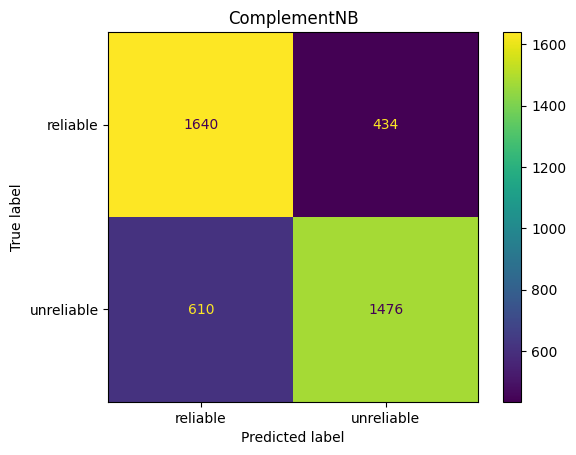

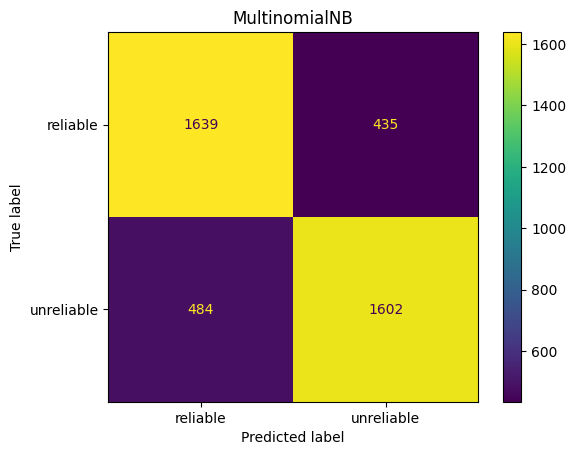

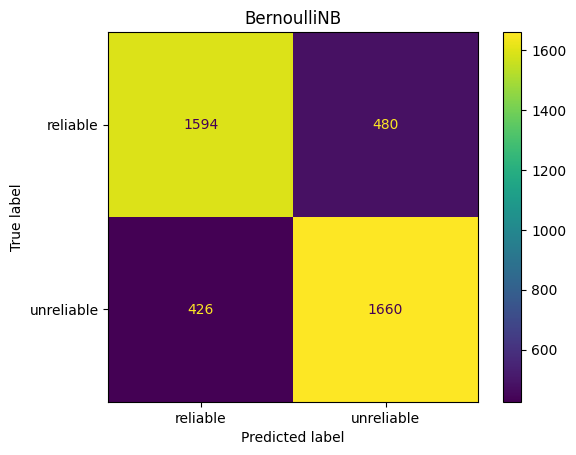

In [ ]:
!pip install scikit-learn --upgrade

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

k= [CNB, MNB, BNB]
for i in k:
    # Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
    disp = ConfusionMatrixDisplay.from_estimator(i, X_test, y_test)
    disp.ax_.set_title(type(i).__name__) # Get the name of the estimator for the title
    plt.show()

# TF-IDF: Term Frequency-Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(nb['title'])

In [ ]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['label'],test_size=0.20,random_state=30)

In [ ]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 78.17%


In [ ]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 78.17%


In [ ]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 75.70%
